In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import anndata as ad

In [ ]:
def z_score_normalization(data):
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

def reorder_columns(df, col_changed, col_position) -> pd.DataFrame:
    """
    Reordering colums. The second input can either be an integer for index or it can be a reference column name. If reference column name is chosen, the column will be placed after the reference column.
    """
    if not isinstance(df, pd.DataFrame):
        raise ValueError("The first argument must be a pandas DataFrame")
    if not isinstance(col_changed, str):
        raise ValueError("The second argument must be a string representing a column name")
    if not isinstance(col_position, (str, int)):
        raise ValueError("The third argument must be either a string representing a column name or an integer representing a column index")
    if isinstance(col_position, int):
        cols = df.columns.tolist()
        if col_changed in cols and col_position <= len(cols) + 1:
            cols.remove(col_changed)
        
            index = col_position
            cols.insert(index, col_changed)
            
            df = df[cols]
    else:
        cols = df.columns.tolist()
        if col_changed in cols and col_position in cols:
            cols.remove(col_changed)
            index = cols.index(col_position)
            cols.insert(index+1, col_changed)
            
            df = df[cols]
    return df

In [ ]:
df = pd.read_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/breast_fibro_IMC/quantification/breast_fibro_IMC.csv')

In [ ]:
df

In [ ]:
df.columns

In [ ]:
df.FSP1

In [ ]:
df.drop(columns=['Panel', 'acID', 'Compartment', 'ImageInfo', 'tumour_nontumour', 'celltype', 'cell_subtype', ], inplace=True) 
df.rename(columns={'cell_subtype2': 'cell_type', 'Center_X': 'x', 'Center_Y': 'y'}, inplace=True)

In [ ]:
df = df.iloc[:, 13:].join(df.iloc[:, :13])

In [ ]:
df

In [ ]:
df.to_csv('/Volumes/Lukas_SSD/phenotyping_benchmark/datasets/breast_fibro_IMC/quantification/processed/breast_fibro_IMC_cleaned.csv', index=False)

In [ ]:
df.drop(columns=['Histone H3', 'Iridium191', 'Iridium193'], inplace=True)

In [35]:
X_columns = df.columns[:df.columns.get_loc('ImageNumber')]
obs_columns =df.columns[df.columns.get_loc('ImageNumber'):]
adata = ad.AnnData(
    X=df[X_columns],
    obs=df[obs_columns],
    var=pd.DataFrame(index=X_columns)
)

/Users/lukashat/miniforge3/envs/preprocess_benchmark/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [36]:

adata.raw = adata.copy()
adata.X = np.arcsinh(adata.X/1)
adata.layers['zscore'] = z_score_normalization(adata.X)
adata.obs['cell_type'] = adata.obs['cell_type'].astype('category')


In [ ]:
sc.pp.neighbors(add)
sc.tl.umap(adata)

In [ ]:
sc.pl.umap(adata, color='cell_type')

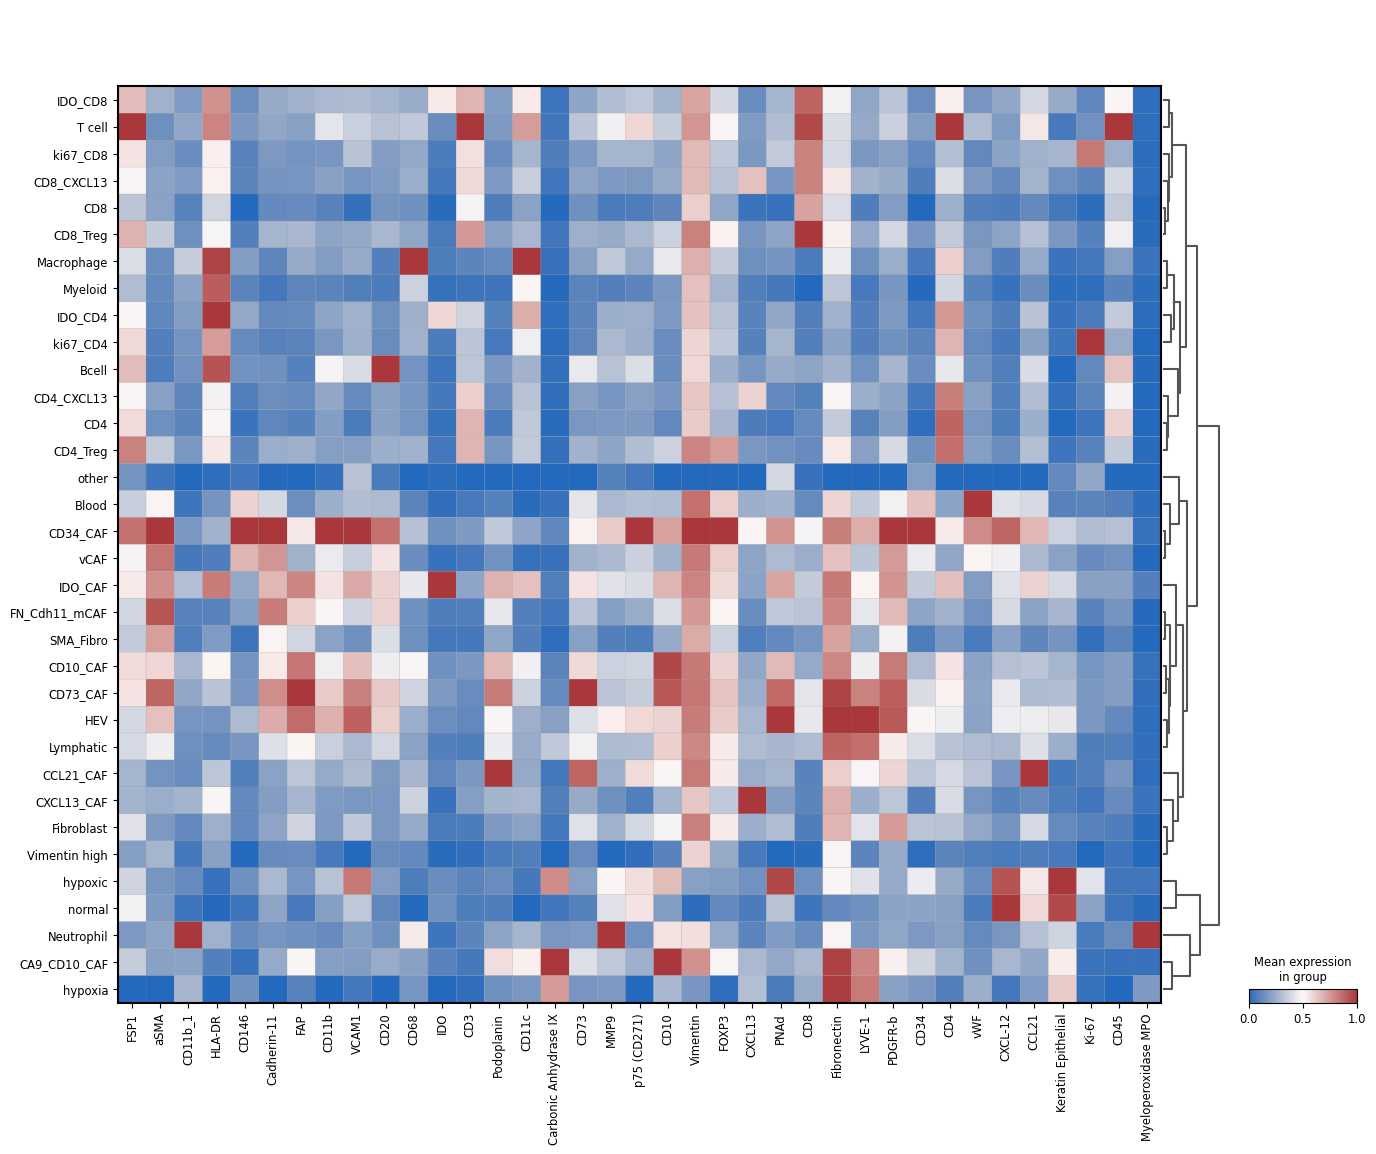

In [37]:
sc.pl.matrixplot(adata, var_names=adata.var_names, groupby='cell_type', cmap='vlag', dendrogram=True, use_raw=False, standard_scale='var')

Hypoxic and normal should most likely be epithelial cells. Lymphatic vessel quite low PDPN, We should think about binning the T cell subsets